## An exploration of the difference of confidence and credible intervals

I believe in many cases these are they same, and I'd like to verify that.

Let's consider the case of a numbers drawn from a normal distribution mean variance of 1 and unknown mean.

For our fake data, let's use a mean of 0.

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mean = 0
sd = 1
pop = stats.norm(mean, sd)

In [6]:
size = 20
data = pop.rvs(size)

To get the confidence interval, take some bootstrap intervals.

In [34]:
n_bootstraps = 100000
bootstraps = np.random.choice(data, (n_bootstraps, size), replace=True)

We'll look at 95% confidence (and credible) intervals.

In [35]:
width = 0.95

In [36]:
means = bootstraps.mean(axis=1)
means.sort()

In [41]:
idx_lower = int(n_bootstraps*(1-width)/2)
idx_upper = int(n_bootstraps*(1+width)/2)

Confidence interval: -0.3020695208772386, 0.5412739195226006


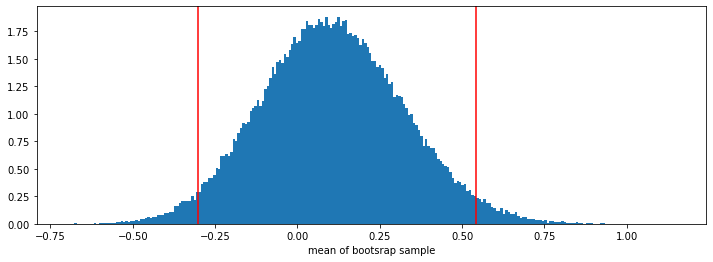

In [83]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.hist(means, bins=250, density=True)

ax.axvline(means[idx_lower], c='r')
ax.axvline(means[idx_upper], c='r')
ax.set_xlabel("mean of bootsrap sample")
print(f"Confidence interval: {means[idx_lower]}, {means[idx_upper]}")

Now let's try credible intervals.

The likelihood function is normal with an unknown mean and variance of 1. Let's do this by breaking the hypothesis into lots of parts. We'll use a uniform prior in some reasonable range.

In [87]:
n_hyps = 200
xlim = -2, 2

hyps = np.linspace(*xlim, n_hyps)
prior = np.ones(n_hyps) / n_hyps

for datum in data:
    prior *= stats.norm(hyps, 1).pdf(datum)

# normalize
prior *=  n_hyps / (xlim[1]-xlim[0]) / prior.sum()

In [88]:
prior.sum()

50.0

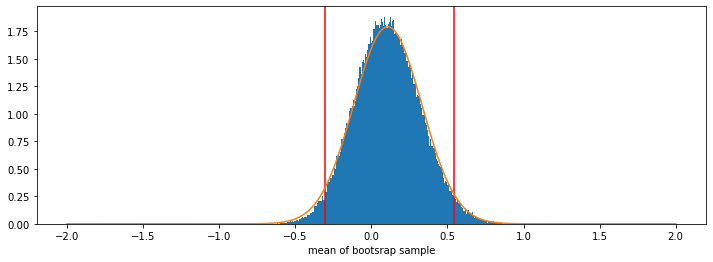

In [86]:
#fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(hyps, prior)
fig

They match!

What if we didn't know the standard deviation?

In [ ]:
n_hyps_mean = 200
n_hyps_sd = 200
lim_mean = -2, 2
lim_sd = -2, 2

hyps_mean = np.linspace(*lim_mean, n_hyps_mean)
hyps_sd = np.linspace(*lim_sd, n_hyps_sd)

prior = np.ones((n_hyps_mean, n_hyps_sd)) / n_hyps

for datum in data:
    prior *= stats.norm(hyps, 1).pdf(datum)

# normalize
prior *=  n_hyps / (xlim[1]-xlim[0]) / prior.sum()